Goal: Find the best location for new wells using the data of previously used locations.

1. Prep

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


BUDGET_TOTAL = 100_000_000  # TOTAL BUDGET IN USD
WELLS_TO_DEVELOP = 200      # NUMBER OF WELLS TO DEVELOP
WELLS_TO_EXPLORE = 500      # NUMBER OF WELLS TO EXPLORE INITIALLY
REVENUE_PER_BARREL = 4.5    # REVENUE PER BARREL IN USD
BARRELS_PER_UNIT = 1000     # VOLUME IS IN THOUSANDS OF BARRELS
MAX_RISK_THRESHOLD = 0.025  # MAXIMUM ACCEPTABLE RISK (2.5%)

region_0 = pd.read_csv(
    r'C:\Users\Justin\Downloads\data\TT projects\9\geo_data_0.csv')
region_1 = pd.read_csv(
    r'C:\Users\Justin\Downloads\data\TT projects\9\geo_data_1.csv')
region_2 = pd.read_csv(
    r'C:\Users\Justin\Downloads\data\TT projects\9\geo_data_2.csv')

In [2]:
region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [3]:
region_0.isnull().any().any()

False

In [4]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
region_1.isnull().any().any()

False

In [6]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
region_2.isnull().any().any()

False

The data set is complete and no immediate changes are needed. The id column will be dropped for model training purposes.

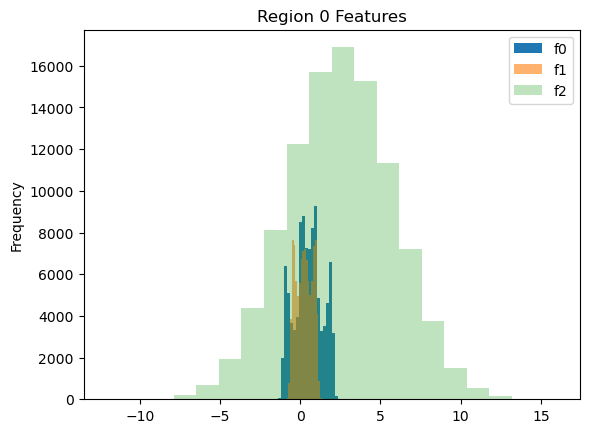

In [ ]:

region_0['f0'].plot(kind='hist', bins=20, title='Region 0 Features')
region_0['f1'].plot(kind='hist', bins=20, alpha=0.6)
region_0['f2'].plot(kind='hist', bins=20, alpha=0.3)
plt.legend(['f0', 'f1', 'f2'])

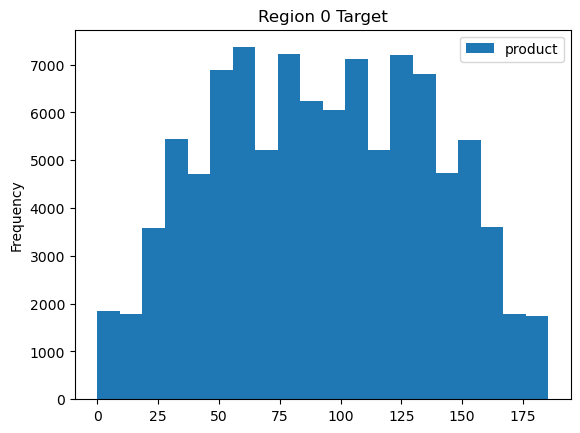

In [ ]:

region_0['product'].plot(kind='hist', bins=20, title='Region 0 Target')
plt.legend(['product'])
plt.show()

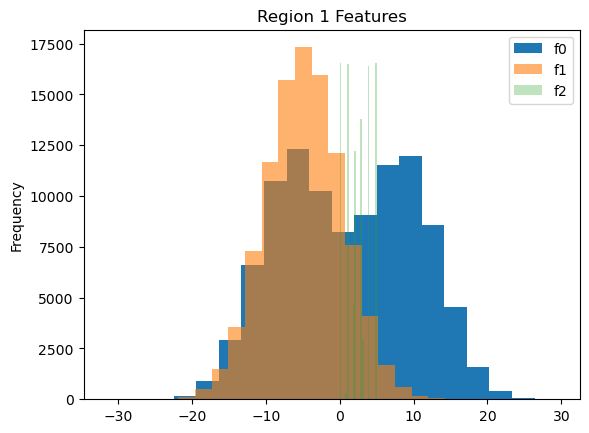

In [ ]:

region_1['f0'].plot(kind='hist', bins=20, title='Region 1 Features')
region_1['f1'].plot(kind='hist', bins=20, alpha=0.6)
region_1['f2'].plot(kind='hist', bins=20, alpha=0.3)
plt.legend(['f0', 'f1', 'f2'])

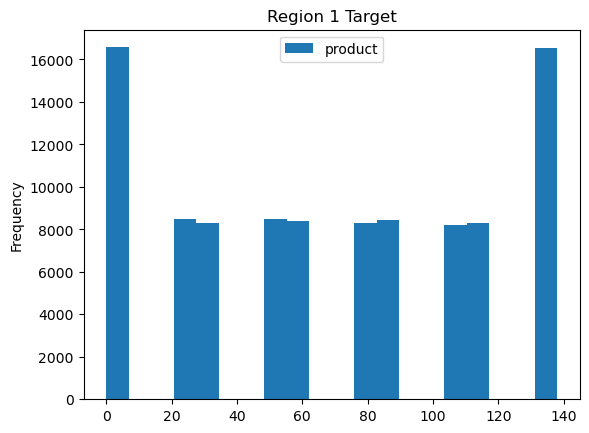

In [11]:
region_1['product'].plot(kind='hist', bins=20, title='Region 1 Target')
plt.legend(['product'])
plt.show()

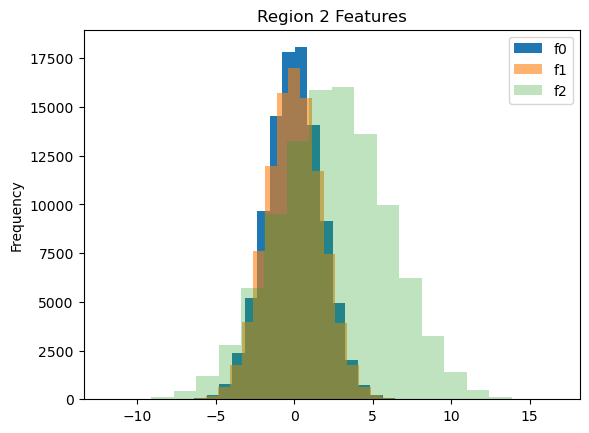

In [ ]:
region_2['f0'].plot(kind='hist', bins=20, title='Region 2 Features')
region_2['f1'].plot(kind='hist', bins=20, alpha=0.6)
region_2['f2'].plot(kind='hist', bins=20, alpha=0.3)
plt.legend(['f0', 'f1', 'f2'])

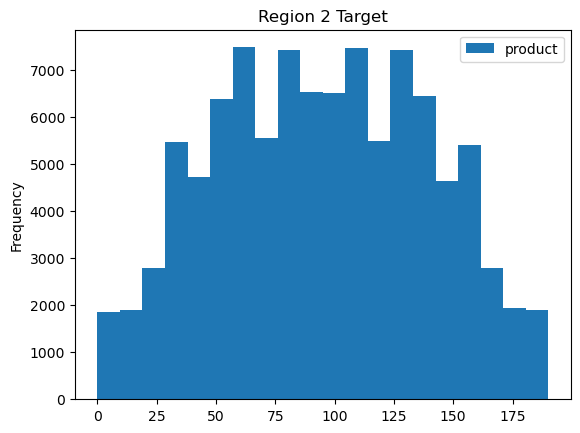

In [13]:
region_2['product'].plot(kind='hist', bins=20, title='Region 2 Target')
plt.legend(['product'])
plt.show()

Regions 0 & 2 have a normal distribution for its targets while the highest frequency for region 1 lays at both of its tails its f2 value is also particularlly narrow. 

2. Model Training

In [14]:
features_0 = region_0.drop(['id', 'product'], axis=1)
features_1 = region_1.drop(['id', 'product'], axis=1)
features_2 = region_2.drop(['id', 'product'], axis=1)

In [15]:
duplicate_count_0 = features_0.duplicated().sum()
duplicate_count_1 = features_1.duplicated().sum()
duplicate_count_2 = features_2.duplicated().sum()
print(f"Number of duplicate rows region 0: {duplicate_count_0}")
print(f"Number of duplicate rows region 1: {duplicate_count_1}")
print(f"Number of duplicate rows region 2: {duplicate_count_2}")

Number of duplicate rows region 0: 0
Number of duplicate rows region 1: 0
Number of duplicate rows region 2: 0


In [16]:
 target_0 = region_0['product']
 target_1 = region_1['product']
 target_2 = region_2['product']

In [ ]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

In [ ]:

model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predictions_0 = model_0.predict(features_valid_0)
predictions_valid_0 = predictions_0  # Model's predictions
target_valid_saved_0 = target_valid_0  # Actual correct values
mse_0 = mean_squared_error(target_valid_saved_0, predictions_valid_0)
predicted_valid_mean_0 = pd.Series(
    target_train_0.mean(), index=target_valid_0.index)
mse_mean_0 = mean_squared_error(target_valid_saved_0, predicted_valid_mean_0)
score_train_0 = model_0.score(features_train_0, target_train_0)

model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predictions_1 = model_1.predict(features_valid_1)
predictions_valid_1 = predictions_1  # Model's predictions
target_valid_saved_1 = target_valid_1  # Actual correct values
mse_1 = mean_squared_error(target_valid_saved_1, predictions_valid_1)
predicted_valid_mean_1 = pd.Series(
    target_train_1.mean(), index=target_valid_1.index)
mse_mean_1 = mean_squared_error(target_valid_saved_1, predicted_valid_mean_1)
score_train_1 = model_1.score(features_train_1, target_train_1)

model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predictions_2 = model_2.predict(features_valid_2)
predictions_valid_2 = predictions_2  # Model's predictions
target_valid_saved_2 = target_valid_2  # Actual correct values
mse_2 = mean_squared_error(target_valid_saved_2, predictions_valid_2)
predicted_valid_mean_2 = pd.Series(
    target_train_2.mean(), index=target_valid_2.index)
mse_mean_2 = mean_squared_error(target_valid_saved_2, predicted_valid_mean_2)
score_train_2 = model_2.score(features_train_2, target_train_2)

print("Accuracy of the linear regression model_0 on the training set:", score_train_0,)
print('Linear Regression')
print('MSE_0 =', mse_0)
print('RMSE_0 =', mse_0 ** 0.5)
print('Mean')
print('MSE_0 =', mse_mean_0)
print('RMSE_0 =', mse_mean_0 ** 0.5)
print('Region 0 average of predicted reserves:', predictions_valid_0.mean())
print("Accuracy of the linear regression model_1 on the training set:", score_train_1,)
print('Linear Regression')
print('MSE_1 =', mse_1)
print('RMSE_1 =', mse_1 ** 1.5)
print('Mean')
print('MSE_1 =', mse_mean_1)
print('RMSE_1 =', mse_mean_1 ** 1.5)
print('Region 1 average of predicted reserves:', predictions_valid_1.mean())
print("Accuracy of the linear regression model_2 on the training set:", score_train_2,)
print('Linear Regression')
print('MSE_2 =', mse_2)
print('RMSE_2 =', mse_2 ** 2.5)
print('Mean')
print('MSE_2 =', mse_mean_2)
print('RMSE_2 =', mse_mean_2 ** 2.5)
print('Region 2 average of predicted reserves:', predictions_valid_2.mean())

Accuracy of the linear regression model_0 on the training set: 0.27423906493940775
Linear Regression
MSE_0 = 1412.2129364399243
RMSE_0 = 37.5794217150813
Mean
MSE_0 = 1961.5678757223516
RMSE_0 = 44.289591053907365
Region 0 average of predicted reserves: 92.59256778438035
Accuracy of the linear regression model_1 on the training set: 0.9996247760326118
Linear Regression
MSE_1 = 0.7976263360391149
RMSE_1 = 0.7123595118299818
Mean
MSE_1 = 2117.9734309299147
RMSE_1 = 97472.19847729869
Region 1 average of predicted reserves: 68.728546895446
Accuracy of the linear regression model_2 on the training set: 0.19661432867329998
Linear Regression
MSE_2 = 1602.3775813236196
RMSE_2 = 102780837.08373258
Mean
MSE_2 = 2016.2210072435087
RMSE_2 = 182534658.8529571
Region 2 average of predicted reserves: 94.96504596800492


Data leak found in region_1 region 0 and 2 are functioning poorly but are giving normative results. In region_1 the f2 value is providing all the predictive power of the model.

Region_1's f2 value has a much narrower range than either of the other 2 varibles.

ratio values often land between 26-28

3. Prep Profit Calc

In [ ]:
cost_per_well = BUDGET_TOTAL / WELLS_TO_DEVELOP
revenue_per_unit = REVENUE_PER_BARREL * BARRELS_PER_UNIT
breakeven_production = cost_per_well / revenue_per_unit
print(cost_per_well)
print(revenue_per_unit)
print(breakeven_production)

500000.0
4500.0
111.11111111111111


In [20]:
print(target_0.mean())
print(target_1.mean())
print(target_2.mean())

92.50000000000001
68.82500000000002
95.00000000000004


Each well will cost $500,000 to develop.
Each unit of production in the tables represent 4,500.
We will need to produce 111.11 units to break even on any given well.
Looking at the breakeven points region two looks like the best of the three how it will still be a loss on average.

4. Calc profit 

In [ ]:
def calculate_profit(predictions, target):
    df = pd.DataFrame({"prediction": predictions, "actual": target})
    # Get top indices by sorting the full DataFrame (ensures alignment)
    top_200 = df.sort_values(by="prediction", ascending=False).head(200)
    # Targets (actual reserves)
    top_200_targets = top_200["actual"]
    # calculate reserves
    reserves = top_200_targets.sum()
    # revenue
    revenue = reserves * revenue_per_unit
    # cost
    total_cost = cost_per_well*200
    # profit
    profit = revenue - total_cost
    return profit


profit_0 = calculate_profit(predictions_valid_0, target_valid_0)
profit_1 = calculate_profit(predictions_valid_1, target_valid_1)
profit_2 = calculate_profit(predictions_valid_2, target_valid_2)
print('Region 0 predicted profit and reserves', profit_0)
print('Region 1 predicted profit and reserves', profit_1)
print('Region 2 predicted profit and reserves', profit_2)

Region 0 predicted profit and reserves 33208260.43139851
Region 1 predicted profit and reserves 24150866.966815114
Region 2 predicted profit and reserves 27103499.635998324


Region 0 has the largest profit by a 5% marign.

5. Risks and Profit for each reigon

In [ ]:
import numpy as np


def confidence_interval_risk(predictions, target):
    state = np.random.RandomState(12345)
    profits = []
    for i in range(1000):
        sample_indices = state.choice(len(predictions), size=500, replace=True)
        profit = calculate_profit(
            predictions[sample_indices], target.iloc[sample_indices])
        profits.append(profit)

    profits_values = pd.Series(profits)
    lower = profits_values.quantile(0.025)
    upper = profits_values.quantile(0.975)
    mean = profits_values.mean()
    losses_count = (profits_values < 0).sum()
    risk = (losses_count/1000)*100
    return lower, upper, mean, risk


confidence_interval_risk_0 = confidence_interval_risk(
    predictions_valid_0, target_valid_0)
confidence_interval_risk_1 = confidence_interval_risk(
    predictions_valid_1, target_valid_1)
confidence_interval_risk_2 = confidence_interval_risk(
    predictions_valid_2, target_valid_2)

print('Region 0 confidence interval, mean and risk (lower, upper, mean, and risk)',
      confidence_interval_risk_0)
print('Region 1 confidence interval, mean and risk (lower, upper, mean, and risk)',
      confidence_interval_risk_1)
print('Region 2 confidence interval, mean and risk (lower, upper, mean, and risk)',
      confidence_interval_risk_2)

Region 0 confidence interval, mean and risk (lower, upper, mean, and risk) (-1112155.4589049604, 9097669.41553423, 3961649.8480237117, 6.9)
Region 1 confidence interval, mean and risk (lower, upper, mean, and risk) (338205.0939898458, 8522894.538660347, 4560451.057866608, 1.5)
Region 2 confidence interval, mean and risk (lower, upper, mean, and risk) (-1633504.1339559986, 9503595.749237997, 4044038.665683568, 7.6)


Region_1 looks to be the best option without dropping the f2 metric that is doing all the heavy lifting for the accuracy of the set, however when dropped it turns into a the worst set and therefore region_0 may be the better option.